### Data Analysis Python Project - Blinkit Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Raw Data

In [14]:
df = pd.read_csv(r"Dataset\blinkit_data.csv")

### Sample Data

In [15]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [16]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### Size of Data

In [17]:
print("SIze of Data :",df.shape)

SIze of Data : (8523, 12)


In [18]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### Data Type

In [19]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data Cleaning

In [20]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [21]:
df["Item Fat Content"] = df["Item Fat Content"].replace({'LF': 'Low Fat',
                                                       'low fat' : 'Low Fat',
                                                       'reg':'Regular'
                                                       })

In [22]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### Businees Requirement


### KPI's Requirements

In [23]:
# Total Sales
total_sales = df['Sales'].sum()


# Avg Sales
avg_sales = df['Sales'].mean()


# No of Ttem Sold
no_of_item_sold = df['Sales'].count()

# Average Rating
avg_rating = df['Rating'].mean()

# Display

print(f"Total Sales: ${total_sales:,.0f}")
print(f"aVERAGE Sales: ${avg_sales:,.0f}")
print(f"No of Items Sold Sales: ${no_of_item_sold:,.0f}")
print(f"Average Rating: ${avg_rating:,.0f}")

Total Sales: $1,201,681
aVERAGE Sales: $141
No of Items Sold Sales: $8,523
Average Rating: $4


### Chart Requirements


**Total Sales by Fat Content**

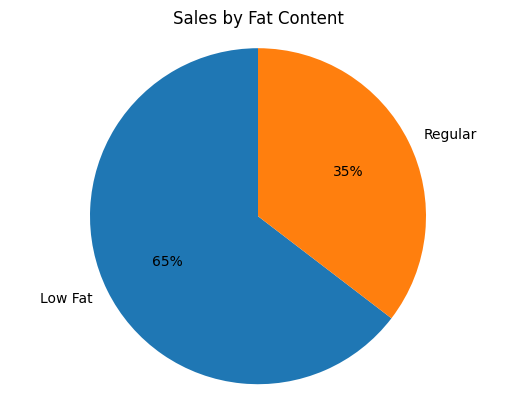

In [25]:
sales_by_fat = df.groupby("Item Fat Content")['Sales'].sum()

plt.pie(sales_by_fat, labels= sales_by_fat.index,
                             autopct= '%.0f%%', 
                             startangle= 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

**Total Sales by Item Type**

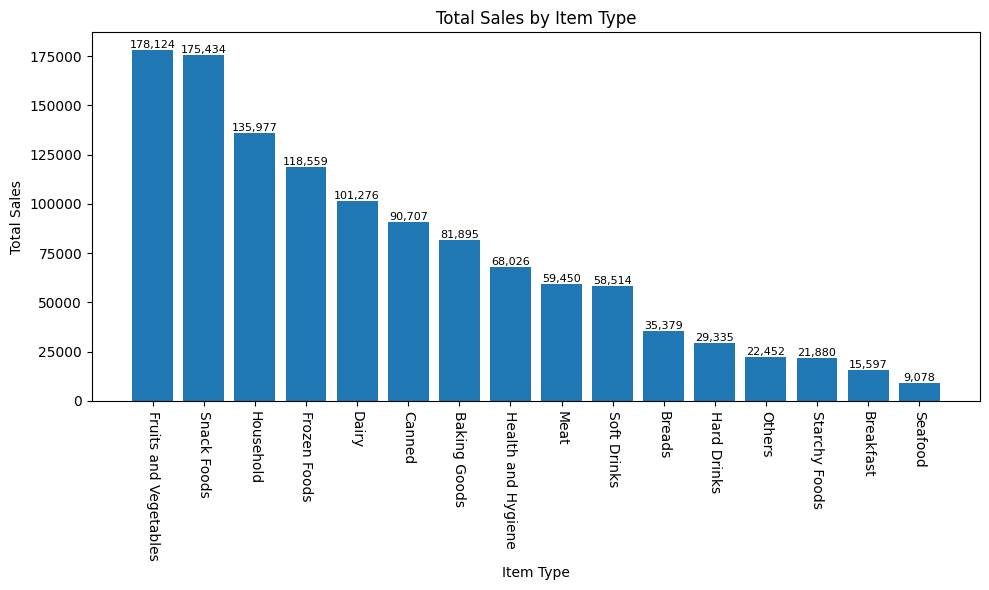

In [30]:
sales_by_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)
    

plt.tight_layout()
plt.show()




**Fat Content by Outlet for Total Sales**

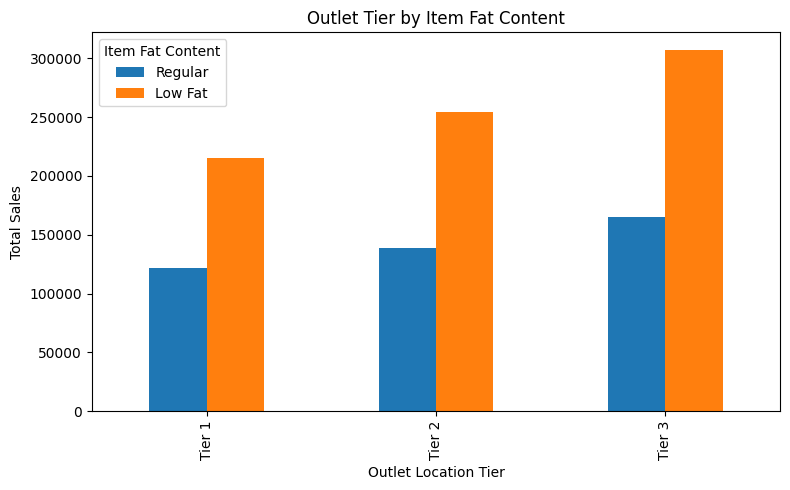

In [38]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8,5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

In [34]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

**Total Sales by Outlet Establishment**

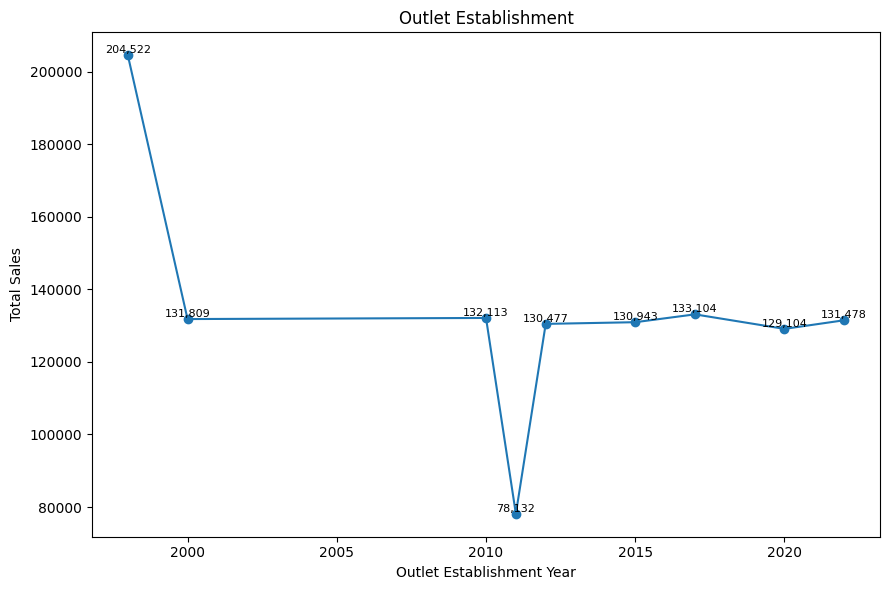

In [43]:
sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()

plt.figure(figsize=(9,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel("Outlet Establishment Year")
plt.ylabel('Total Sales')
plt.title("Outlet Establishment")

for x,y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom',fontsize=8)
    
plt.tight_layout()
plt.show()

**Sales by Outlet Size**

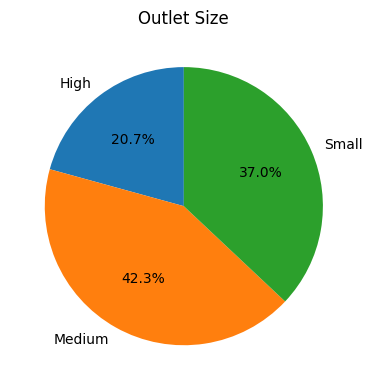

In [44]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

**Sales by Outlet Location**

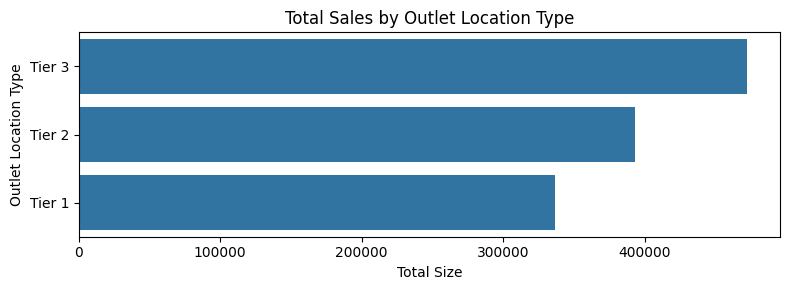

In [47]:
sales_by_location = df.groupby("Outlet Location Type")['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8,3)) #smaller hight, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Size')
plt.ylabel('Outlet Location Type')

plt.tight_layout() #Ensures Layout fits without scroll
plt.show()
